In [1]:
import os
import re
import pickle
import random
import json
from typing import Tuple, List

import numpy as np
import pandas as pd

from collections import Counter
from collections import defaultdict

import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_frequency(frequency, x_label=None, y_label=None, filename=None):
    width = 1

    labels, values = zip(*frequency.items())

    df = pd.DataFrame({
        'Labels': labels,
        'Frequencies': values
    })
    df = df.sort_values('Frequencies', ascending=False)

    indexes = np.arange(len(df['Labels']))
    width = 1

    plt.bar(indexes, df['Frequencies'], width)
    plt.xticks(indexes + width * 0.5, df['Labels'], rotation=45 if len(str(labels[0])) > 3 else 0, ha='right')
    
    if x_label is not None:
        plt.xlabel(x_label)

    if y_label is not None:
        plt.ylabel(y_label)
    
    plt.tight_layout()
    
    if filename is not None:
        plt.savefig(filename)
    plt.show()

    
def get_similar(words: List[str]):
    """
    Consider `words` = ['nejznámějšího', 'nejvýznamnější', 'nejvíce', 'nejvýznamnějšího',
        'nejvýznamnějších', 'nejznámější'].
    List of lists representing equivalence class is returned, i.e. [['nejznámějšího', 'nejznámější'],
        ['nejvýznamnější', 'nejvýznamnějšího', 'nejvýznamnějších'], ['nejvíce']]
    :param words: list of words
    :return: equivalence classes of the words
    """
    words.sort()

    eq_classes = []
    processed = 0
    while len(words) != processed:
        eq_class_representative = words[processed]
        tolerance = len(eq_class_representative) - 2

        eq_class = [eq_class_representative]

        processed += 1
        while processed < len(words):
            maybe_member = words[processed]
            # `maybe_member` is in same equivalence class
            # as `eq_class_representative`
            if eq_class_representative[:tolerance] == maybe_member[:tolerance]:
                eq_class.append(maybe_member)
            else:
                break

            processed += 1

        eq_classes.append(eq_class)

    return eq_classes


# Usage:
# eq_classes = get_similar(['nejznámějšího', 'nejvýznamnější', 'nejvíce', 'nejvýznamnějšího',
#     'nejvýznamnějších', 'nejznámější'])
# print(eq_classes)

def compress_model(model, min_occurrence: int):
    compressed_model = {}
    for k, v in model.items():
        if v < min_occurrence:
            continue
            
        compressed_model[k] = v

    return compressed_model

# Compress unigram model

In [2]:
with open('../models/model-1-gram-uk.pickle', mode='rb') as f:
    model = pickle.load(f)

compressed_model = compress_model(model, 20)

print('Sample from compressed unigram model:', random.sample(list(compressed_model.items()), 10))
    
with open('../models/wordlist_with_counts-compressed-uk.pickle', mode='wb') as f:
    pickle.dump(compressed_model, f)

with open('../models/wordlist_with_counts-compressed.json', mode='w') as f:
    f.write(json.dumps(compressed_model, separators=(',', ':')))

Sample from compressed unigram model: [('бедржих', 35), ('епідемією', 173), ('тиньк', 40), ('присвоєного', 47), ('голарктичного', 33), ('адміністративну', 795), ('господарства', 18162), ('наборами', 141), ('єврейка', 80), ('фронталє', 25)]


# Compress bigram model

In [3]:
with open('../models/model-2-gram-uk.pickle', mode='rb') as f:
    model = pickle.load(f)

compressed_model = compress_model(model, 10)
trie_model = {}

for k, v in compressed_model.items():
    first, second = k
    
    if first not in trie_model:
        trie_model[first] = {}
    
    trie_model[first][second] = v

print('Sample from compressed bigram model:', random.sample(list(trie_model.items()), 10))

with open('../models/model-2-gram-compressed-uk.pickle', mode='wb') as f:
    pickle.dump(trie_model, f)

with open('../models/model-2-gram-compressed-uk.json', mode='w') as f:
    f.write(json.dumps(trie_model, separators=(',', ':')))

Sample from compressed bigram model: [('міжурядової', {'українсько': 14, 'угоди': 10}), ('фундушевий', {'запис': 11}), ('сезону', {'захищав': 16, 'зайняв': 12, 'через': 28, 'отримав': 18, 'повернувся': 33, 'виступати': 23, 'дощів': 90, 'команда': 185, 'серіалу': 104, 'підвищилися': 40, 'розмноження': 47, 'вийшла': 11, 'команду': 17, 'покинув': 24, 'кількість': 14, 'проти': 23, 'анімаційного': 20, 'після': 15, 'провів': 75, 'команди': 11, 'перейшов': 53, 'приєднався': 11, 'телесеріалу': 34, 'мультсеріалу': 24, 'стали': 47, 'відбулася': 25, 'відбувся': 15, 'зіграв': 42, 'відбулась': 10, 'виступав': 21, 'футболіст': 21, 'вилетів': 13, 'знову': 27, 'олександр': 11, 'посіла': 11, 'посів': 12, 'залишив': 13, 'завершив': 11, 'чемпіон': 14, 'відіграв': 16, 'також': 14, 'американського': 104, 'полишили': 79, 'стала': 45, 'немає': 10, 'кожна': 39, 'конференції': 30, 'кожного': 20, 'переможцем': 11}), ('аанг', {'використовував': 10}), ('тема', {'проходить': 12, 'виражена': 20, 'докторської': 25, 

In [6]:
print('Sample from compressed bigram model:', random.sample(list(trie_model.items()), 10))

Sample from compressed bigram model: [('прилеглі', {'території': 39, 'землі': 13, 'райони': 11, 'острови': 27, 'вулиці': 22}), ('герцаївський', {'район': 12}), ('дуловим', {'гальмом': 10}), ('саліцилової', {'кислоти': 21}), ('прийомний', {'батько': 10}), ('проникають', {'через': 19, 'всередину': 10}), ('чайкинська', {'сільська': 11}), ('наданих', {'послуг': 17}), ('мет', {'ґрейнінґ': 13}), ('переможцем', {'юнацького': 12, 'турніру': 236, 'першої': 22, 'вперше': 17, 'стала': 115, 'кубка': 81, 'конкурсу': 75, 'багатьох': 13, 'цього': 16, 'першого': 34, 'чемпіонату': 126, 'змагань': 28, 'стало': 16, 'кубку': 53, 'молодіжного': 17, 'першості': 20, 'сезону': 119, 'міжнародного': 21, 'вдруге': 14, 'другої': 12, 'ставав': 16, 'національного': 57, 'всеукраїнського': 14, 'обласного': 14, 'якого': 15, 'вважається': 11, 'премії': 11, 'другого': 10, 'групи': 12, 'гонки': 10, 'вийшов': 10, 'втретє': 12})]


# Evaluation
Using sample text, find how many keystrokes does picking next-word prediction save.

## Preparation

In [5]:
with open('../models/model-2-gram-compressed.pickle', mode='rb') as f:
    model = pickle.load(f)

with open('../models/wordlist_with_counts-compressed.pickle', mode='rb') as f:
    wordlist_with_counts = pickle.load(f)

# with open('../models/model-2-gram-enhanced.pickle', mode='rb') as f:
#     model = pickle.load(f)

# with open('../models/wordlist_with_counts-enhanced.pickle', mode='rb') as f:
#     wordlist_with_counts = pickle.load(f)


wordlist = list(wordlist_with_counts.keys())

def predict_with_unigram_model(to_find_ending: str, n: int) -> str:
    if len(to_find_ending) == 0:
        return []

    relevant_next_words = list(filter(
        lambda w: w.startswith(to_find_ending),
        wordlist
    ))
    
    if len(relevant_next_words) == 0:
        return []

    relevant_next_words.sort(key=lambda x: wordlist_with_counts[x], reverse=True)
    relevant_next_words = relevant_next_words[:n]

    return relevant_next_words
    
def predict_ending(sequence: Tuple[str, ...], n=1) -> List[str]:
    """
    Finds `n` most "probable" endings of the last word in a sequence `sequence`.
    :param sequence: sequence of words.
    :param n: how many predictions to return.
    :return: `n` most "probable" endings of the last word in a sequence `sequence`.
    """
    to_find_ending = sequence[-1]
    without_to_find = sequence[:-1]

    last_word = without_to_find[-1]

    if last_word in model:
        next_words = model[last_word]
        
        relevant_next_words = list(filter(
            lambda w: w.startswith(to_find_ending) and next_words[w] >= 1,
            next_words.keys()
        ))
        
        if len(relevant_next_words) == 0:
            return predict_with_unigram_model(to_find_ending, n), 'bigram fallback'
        
        relevant_next_words.sort(key=lambda x: next_words[x], reverse=True)
        relevant_next_words = relevant_next_words[:n]

        return relevant_next_words, 'bigram model'
    
    return predict_with_unigram_model(to_find_ending, n), 'final unigram fallback'

def space_idx(text: str, start: int=0) -> int:
    try:
        idx = text.index(' ', start)
        return idx
    except ValueError:
        return len(text)

def word_length(word: str) -> int:
    accented = list('ěéščřžýáíďťňóůú' + 'ěéščřžýáíďťňóůú'.upper())
    return len(word) + sum([c in accented for c in list(word)])
    
def evaluate(text: str, test_idx: int, prediction_count=5, verbose=False):
    text = text.lower()

    keystrokes = 0
    last_space_idx = space_idx(text)
    i = last_space_idx + 2

    saved_keystrokes = 0
    saved_keystrokes_per_length = defaultdict(lambda: 0)
    saved_keystrokes_total_per_type = defaultdict(lambda: 0)
    success_type = defaultdict(lambda: 0)

    while i < len(text):
        if text[i] == ' ':
            last_space_idx = i

        typed = text[last_space_idx + 1 : i]
        word_target = text[last_space_idx + 1 : space_idx(text, last_space_idx + 1)]

        prefix = text[:i]

        next_word_predictions, info = predict_ending(prefix.split(), n=prediction_count)

#        if verbose:
#            print(f'typed: \"{typed}\", word_target: \"{word_target}\", next_word_predictions: \"{next_word_predictions}\"')

        accepting_suggestion_is_also_keystroke = 1
    
        valid_prefixes = list(filter(lambda w: w[-1] == '-' and word_target.startswith(w[:-1]), next_word_predictions))
        # we are accepting word prefix
        if len(valid_prefixes) > 0:
            selected_prefix = valid_prefixes[0][:-1] # [:-1] remove the last dash
            
            cur_saved_keystrokes = word_length(selected_prefix) - word_length(typed) - accepting_suggestion_is_also_keystroke
            
            if cur_saved_keystrokes >= 3:
                saved_keystrokes_per_length[cur_saved_keystrokes] += 1
                success_type[info] += 1
                saved_keystrokes_total_per_type[info] += cur_saved_keystrokes

                # go to the end of the prefix
                i += len(selected_prefix) - len(typed)
                keystrokes += accepting_suggestion_is_also_keystroke
                saved_keystrokes += cur_saved_keystrokes
                continue
            
            
        # we are suggesting target word AND we can save at least 3 keystrokes (considering accepting is also keystroke)
        elif word_target in next_word_predictions and word_length(word_target) - word_length(typed) - accepting_suggestion_is_also_keystroke > 3:
            cur_saved_keystrokes = word_length(word_target) - word_length(typed) - accepting_suggestion_is_also_keystroke
            
            saved_keystrokes_per_length[cur_saved_keystrokes] += 1
            success_type[info] += 1
            saved_keystrokes_total_per_type[info] += cur_saved_keystrokes
            
            # go to the end of the word (TODO: maybe space??)
            i += len(word_target) - len(typed)
            keystrokes += accepting_suggestion_is_also_keystroke
            saved_keystrokes += cur_saved_keystrokes
            continue

        keystrokes += 1
        i += 1

    
    if verbose:
        # how many times we saved `k` keystrokes.
        plot_frequency(
            saved_keystrokes_per_length,
            x_label='Saved keystroke count',
            y_label='How often this happened',
            filename=f'prediction-saved-keystrokes-count-{test_idx+1}.svg'
        )
        # how many times we successfully used prediction of a given type
        plot_frequency(
            success_type,
            x_label='Suggestion type',
            y_label='How often we used this type of suggestion',
            filename=f'prediction-success-count-per-type-{test_idx+1}.svg'
        )
        # how many keystrokes were saved by each type
        plot_frequency(
            saved_keystrokes_total_per_type,
            x_label='Suggestion type',
            y_label='How many keystrokes were saved by each type',
            filename=f'prediction-total-saved-keystrokes-per-type-{test_idx+1}.svg')
        
        print(f'Model managed to save {saved_keystrokes} keystrokes out of total {len(text)} characters, i.e. {((saved_keystrokes / len(text)) * 100):.2f} % of keystrokes.')
        print(f'User had to make {len(text) - saved_keystrokes} keystrokes')

    return saved_keystrokes

texts = [
    # https://cs.wikipedia.org/wiki/Kosatka_drav%C3%A1
    "Ve světových jazycích občas používaný název „velryba zabiják“ odráží její pověst velkolepého a obávaného mořského savce, jak byla popsána již v Historii naturalis římského filozofa Plinia staršího. Člověka kosatky zpravidla nenapadají, byť bylo zaznamenáno několik málo případů, kdy kosatky napadly člověka či malou loď poté, co si je spletly se svojí oblíbenou kořistí. Po rozpoznání omylu svůj útok vždy okamžitě ukončily. Pouze u kosatek chovaných v zajetí se vyskytlo několik málo případů, kdy kosatky napadly personál mořského akvária. V roce 2020 však bylo zaznamenáno několik evidentně cílených útoků kosatek na lodě v oblasti okolo Gibraltarského průlivu.",
    # https://cs.wikipedia.org/wiki/Tule%C5%88_krabo%C5%BErav%C3%BD
    "V porovnání s ostatními tuleni mají poměrně dlouhou hlavu i čenich a štíhlé tělo, dorůstají délky 200 až 240 cm a váží 200 až 300 kg, samice bývají o poznání větší. Na zádech mají srst tmavě a po stranách světle hnědou, v ploutve přeměněné končetiny jsou nejtmavší části těla. V průběhu roku se barva srsti mění, v létě je světlejší. Starší zvířata jsou čím dál bledší a mohou se objevit i téměř bílá. Ze všech tuleňů se pohybují po ledu i rovné půdě nejrychleji, s pomoci předních ploutví se vlní vpřed podobně jako hadi, dosahují krátkodobě rychlost i 20 km/h, dokážou takto zdolat i dlouhé vzdáleností. Někteří tuleni krabožraví, kteří pravděpodobně zabloudilí, šli místo k moři i přes 110 km opačně od břehu směrem do nitra Antarktidy až do nadmořské výšky téměř 1000 m kde byli viděni ještě živí, určitě při takové cestě ale zahynou a zmrznou. Nejvíce jsou ohrožená mláďata vstupující poprvé do vody, kde na ně číhá nejen typický nepřítel dospělých zvířat kosatka dravá (Orcinus orca), ale i dravý tuleň leopardí (Hydrurga leptonyx), do dovršení jednoho roku pravděpodobně uhyne okolo 80 % mláďat. Tuleň krabožravý se při napadení převaluje, syčí a cení na nepřítele zuby. Tito tuleni nejsou obvykle příliš loveni, jejich lov od Antarktidy až po 60. jižní rovnoběžku zakazuje mj. Smlouva o Antarktidě a také Úmluva o zachování antarktických tuleňů. Snížení populace za posledních 30 let nebylo pozorováno. Celkový počet zvířat se jen hrubě odhaduje na přibližnou hodnotu okolo 10 miliónů jedinců, je to nejpočetnější druh tuleňů a jeden z nehojnějších velkých savců na Zemi. Podle Červeného seznamu IUCN je tuleň krabožravý považován za málo dotčený druh.",
    # R.U.R
    "V čítankách je placená reklama a ostatně nesmysl. Stojí tam například, že Roboty vynalezl starý pán. Zatím se starý snad hodil na univerzitu, ale o tovární výrobě neměl ponětí. Myslel, že udělá skutečné lidi, tedy snad nějaké nové indiány, docenty nebo idioty, víte? A teprve mladý Rossum měl nápad udělat z toho živé a inteligentní pracovní stroje. Co je v čítankách o spolupráci obou velikých Rossumů, je povídačka.",
    "Velikonoce jsou nejvýznamnějším křesťanským svátkem, oslavou zmrtvýchvstání Ježíše Krista. Vedle toho jsou Velikonoce obdobím lidových tradic spojených s vítáním jara, které s náboženským svátkem souvisejí jen volně. V užším náboženském pojetí se Velikonocemi míní pouze slavnost Zmrtvýchvstání Páně neboli Vzkříšení Krista (Boží hod velikonoční), ke kterému mělo dojít třetího dne po jeho ukřižování, resp. vigilie na Bílou sobotu („velká noc“), v širším pojetí se jimi myslí Velikonoční triduum (přičemž období od Zeleného čtvrtka až do sobotní vigilie je vlastně součástí postní doby, tedy ne doby velikonoční, toto pojetí je tedy terminologicky ne zcela správné), v nejširším smyslu pak celá doba velikonoční, tedy padesátidenní období od neděle Zmrtvýchvstání do letnic. Kristovo ukřižování se událo kolem roku 30 či 33 v blízkosti významného židovského svátku pesach, který je památkou vysvobození Izraelitů Mojžíšem z egyptského otroctví. Tak jako Letnice jsou tedy původně (i podle latinského názvu) svátkem židovským a do roku 325 se slavily ve stejný den jako svátek židovský. Velikonoce jsou pohyblivý svátek, datum se rok od roku mění, viz Výpočet data Velikonoc. V západní křesťanské tradici neděle Zmrtvýchvstání připadá na první neděli po prvním jarním úplňku po rovnodennosti, tedy na měsíc březen či duben.",
]

# With enhancement
# 13.12 %
# 16.69 %
# 8.15 %
# 21.01 %

# Without enhancement
# 15.08 %
# 18.98 %
# 6.00 %
# 19.20 %



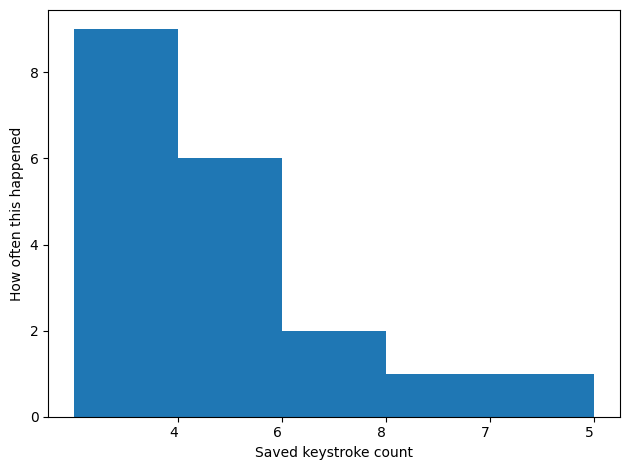

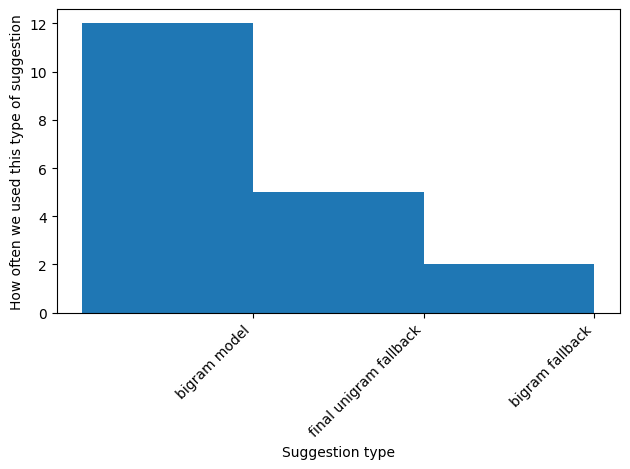

Model managed to save 100 keystrokes out of total 663 characters, i.e. 15.08 % of keystrokes.
User had to make 563 keystrokes
100 663


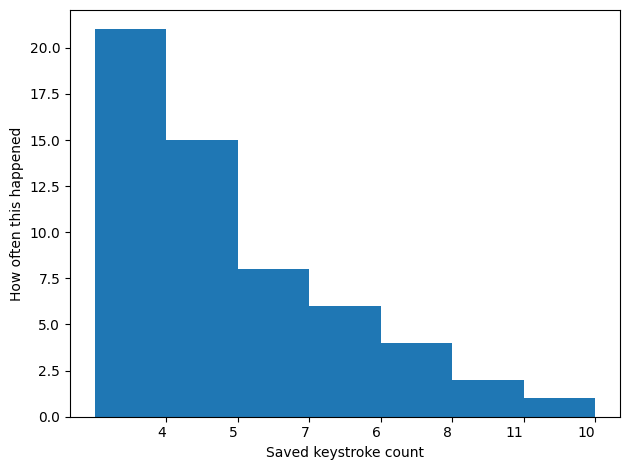

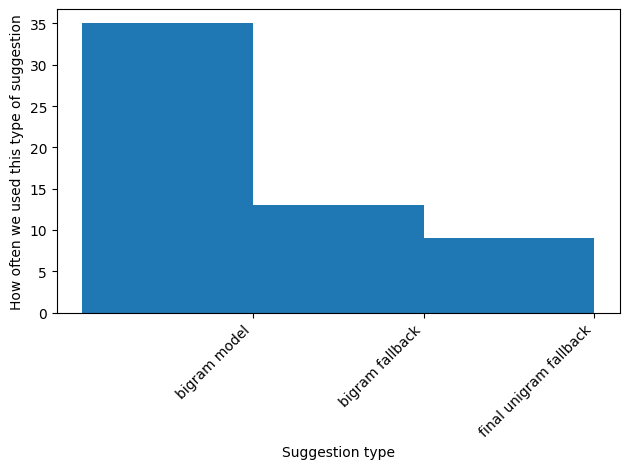

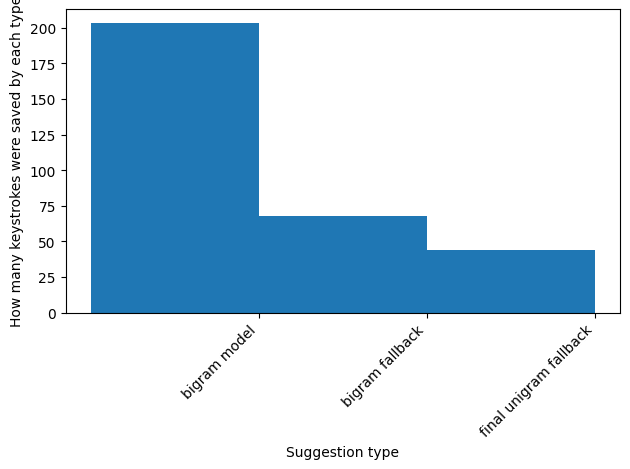

Model managed to save 315 keystrokes out of total 1660 characters, i.e. 18.98 % of keystrokes.
User had to make 1345 keystrokes
315 1660


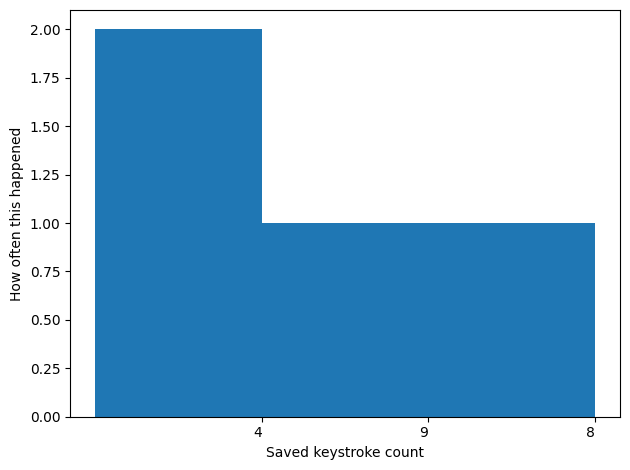

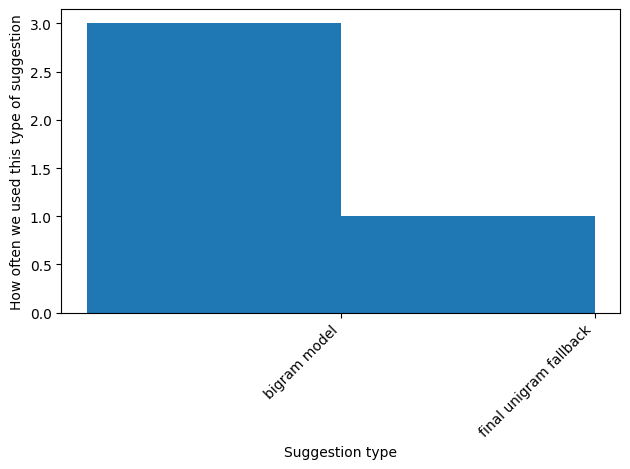

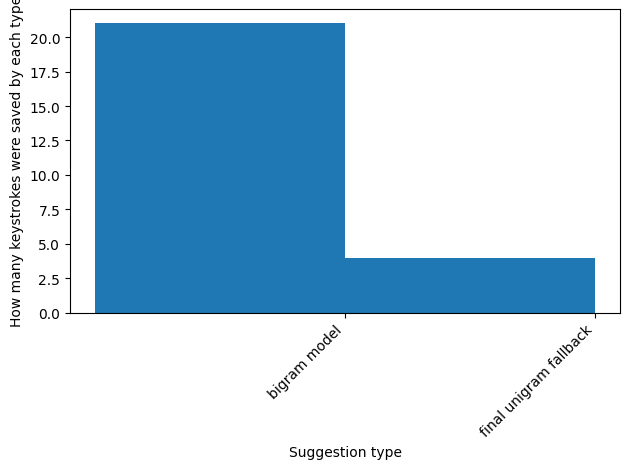

Model managed to save 25 keystrokes out of total 417 characters, i.e. 6.00 % of keystrokes.
User had to make 392 keystrokes
25 417


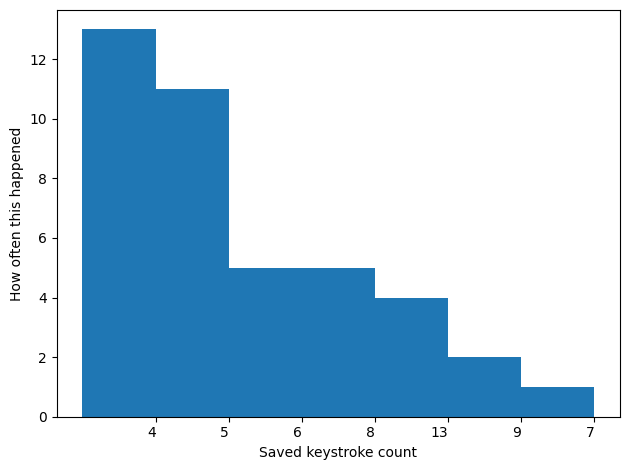

Model managed to save 254 keystrokes out of total 1323 characters, i.e. 19.20 % of keystrokes.
User had to make 1069 keystrokes
254 1323


In [6]:
for text_idx, text in enumerate(texts):
    saved_keystrokes = evaluate(text, text_idx, prediction_count=3, verbose=True)
    print(saved_keystrokes, len(text))

# Long word enhancement
In Czech language there are 7 cases. Changing the case of the word can change the suffix, also changing from singular to plural form can change the suffix. So, for each word we have 7 * 2 = 14 forms at maximum. We are suggesting only 3 words. This means that if multiple word forms can follow the last word we are guessing a lot. Consider that user wrote `jsou nejvý`. Then the suggestion can be for example `nejvýznamnější` (druh), `nejvýznamnějším` (svátkem), or `nejvýznamněji` (zastoupeni). The longest common prefix is `nejvýznamněj`. If we suggest the common prefix instead of all the possible forms we have much higher probability user will pick it and specify the suffix afterwards. Notice that suffixes are usually not very long.

In the previous example we would save 8 keystrokes which is not negligible.

In [8]:
min_length_to_shorten_unigram = 7
min_length_to_shorten_bigram = 7

## Enhance unigram model

In [9]:
with open('../models/wordlist_with_counts-compressed-uk.pickle', mode='rb') as f:
    wordlist_with_counts = pickle.load(f)

longer_words = list(filter(lambda w: len(w) >= min_length_to_shorten_unigram, list(wordlist_with_counts.keys())))
eq_classes = get_similar(longer_words)

def get_prefix_of_eq_class(eq_class: List[str]):
    return os.path.commonprefix(eq_class)

def enhance_model(model, eq_classes_to_consider):
    for eq_class in eq_classes_to_consider:
        if len(eq_class) == 1:
            continue
        
        longest_common_prefix = get_prefix_of_eq_class(eq_class)
        new_total = 0
        
        for member in eq_class:
            if len(member) < len(longest_common_prefix) - 2:
                continue
            
            new_total += model[member]
            del model[member]
        
        model[longest_common_prefix + '-'] = new_total
    
    return model

enhanced_model = enhance_model(wordlist_with_counts, eq_classes)
with open('../models/wordlist_with_counts-enhanced-uk.pickle', mode='wb') as f:
    pickle.dump(enhanced_model, f)

with open('../models/wordlist_with_counts-enhanced-uk.json', mode='w') as f:
    f.write(json.dumps(enhanced_model, separators=(',', ':')))

In [12]:
print('Sample from equivalence classes:', random.sample(list(enhanced_model.keys()), 10))

Sample from equivalence classes: ['адамом', 'плеврит-', 'ковта-', 'логойськ-', 'ієрогліф-', 'відсиді-', 'мчали', 'знеболювання', 'сохацьк-', 'тости']


## Enhance bigram model

In [14]:
with open('../models/model-2-gram-compressed-uk.pickle', mode='rb') as f:
    bigram_model = pickle.load(f)

for key in bigram_model.keys():
    suggestions = list(bigram_model[key].keys())
    longer_words = list(filter(lambda w: len(w) >= min_length_to_shorten_bigram, suggestions))
    eq_classes = get_similar(longer_words)
    bigram_model[key] = enhance_model(bigram_model[key], eq_classes)

with open('../models/model-2-gram-enhanced-uk.pickle', mode='wb') as f:
    pickle.dump(bigram_model, f)

with open('../models/model-2-gram-enhanced-uk.json', mode='w') as f:
    f.write(json.dumps(bigram_model, separators=(',', ':')))

In [ ]:
print('Sample from equivalence classes:', random.sample(list(bigram_model.items()), 10))